In [48]:
import pacmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

penguins = (
    sns.load_dataset('penguins')
    .dropna()
    .rename(
        columns={
            "bill_length_mm": "bill-length", 
            "bill_depth_mm": "bill-depth", 
            "flipper_length_mm": "flipper-length", 
            "body_mass_g": "body-mass"
        }
    )
)


In [16]:
print(penguins.columns)
print(penguins.dtypes)
print(len(penguins))

Index(['species', 'island', 'bill-length', 'bill-depth', 'flipper-length',
       'body-mass', 'sex'],
      dtype='object')
species            object
island             object
bill-length       float64
bill-depth        float64
flipper-length    float64
body-mass         float64
sex                object
dtype: object
333


In [15]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['species', 'island', 'sex']
penguins_categorical = penguins[categorical_cols]
encoder = OneHotEncoder()
one_hot_encoded = encoder.fit_transform(penguins_categorical)
one_hot_encoded_df = pd.DataFrame(one_hot_encoded.toarray(), columns=encoder.get_feature_names(categorical_cols))
penguins_encoded = pd.concat([penguins.drop(columns=categorical_cols), one_hot_encoded_df], axis=1)
penguins_encoded = penguins_encoded.dropna()
print(penguins_encoded.head())
print(len(penguins_encoded))

   bill-length  bill-depth  flipper-length  body-mass  species_Adelie  \
0         39.1        18.7           181.0     3750.0             1.0   
1         39.5        17.4           186.0     3800.0             1.0   
2         40.3        18.0           195.0     3250.0             1.0   
4         36.7        19.3           193.0     3450.0             1.0   
5         39.3        20.6           190.0     3650.0             1.0   

   species_Chinstrap  species_Gentoo  island_Biscoe  island_Dream  \
0                0.0             0.0            0.0           0.0   
1                0.0             0.0            0.0           0.0   
2                0.0             0.0            0.0           0.0   
4                0.0             0.0            0.0           0.0   
5                0.0             0.0            0.0           0.0   

   island_Torgersen  sex_Female  sex_Male  
0               1.0         0.0       1.0  
1               1.0         1.0       0.0  
2             

C:\Users\isido\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [18]:
penguins_np = penguins_encoded.to_numpy()
print(penguins_np)

[[ 39.1  18.7 181.  ...   1.    0.    1. ]
 [ 39.5  17.4 186.  ...   1.    1.    0. ]
 [ 40.3  18.  195.  ...   1.    1.    0. ]
 ...
 [ 50.5  15.2 216.  ...   0.    0.    1. ]
 [ 49.8  15.9 229.  ...   0.    1.    0. ]
 [ 43.5  15.2 213.  ...   0.    0.    1. ]]


In [34]:
X = penguins_np[:,:-2]
y= penguins_np[:,-1]

In [35]:
print(X.shape)
print(y.shape)

(324, 10)
(324,)


In [49]:
data_for_umap = RobustScaler().fit_transform(penguins.select_dtypes(include="number"))
print(data_for_umap[1])

[-0.54945055  0.03225806 -0.47826087 -0.20408163]


In [60]:
print(penguins["species"].unique())

['Adelie' 'Chinstrap' 'Gentoo']


In [61]:
def map_species(txt):
    m = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
    return m[txt] 

X = data_for_umap
y = penguins["species"].apply(map_species)
print(len(X),len(y))

333 333


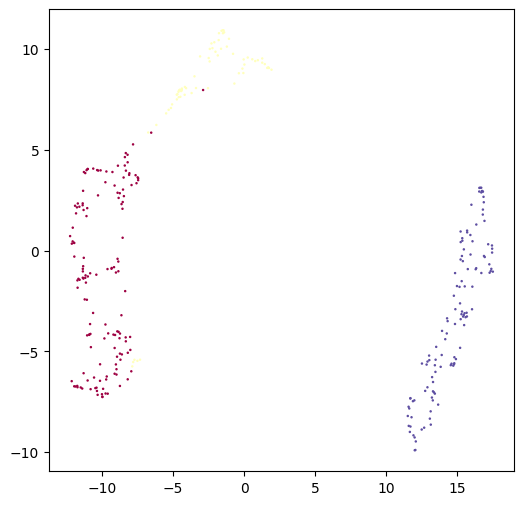

In [64]:

# loading preprocessed coil_20 dataset
# you can change it with any dataset that is in the ndarray format, with the shape (N, D)
# where N is the number of samples and D is the dimension of each sample
# initializing the pacmap instance
# Setting n_neighbors to "None" leads to a default choice shown below in "parameter" section
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 

# fit the data (The index of transformed data corresponds to the index of the original data)
X_transformed = embedding.fit_transform(X, init="pca")

# visualize the embedding
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X_transformed[:, 0], X_transformed[:, 1], cmap="Spectral", c=y, s=0.6)
plt.show()